In [25]:
#Dependencies
import timeit
from tqdm import tqdm
import pickle
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
import time
import pandas as pd
import missingno
import re
from config import * 

# Extract

## Get urls of the listing for the 3 rental categories

In [27]:
url_longTerm_rental="https://www.kijiji.ca/b-apartments-condos/city-of-toronto"
url_longTerm_base="/c37l1700273"
pageNos = '/page-'
url_shortTerm_rental="https://www.kijiji.ca/b-short-term-rental/city-of-toronto"
url_shortTerm_base="/c42l1700273"
url_roomRoomates_rental="https://www.kijiji.ca/b-room-rental-roommate/city-of-toronto"
url_roomRoomates_base="/c36l1700273"
error_list=[]

In [28]:
def kijiji_getUrls(url, base):
    url_list=[]
    for i in tqdm(range(100)):
        url_final = url+pageNos+str(i)+base
        response = requests.get(url_final)
        soup = bs(response.text, "html.parser")
        results= soup.find_all("div", class_="search-item")
        for r in results:
            url_list.append("https://www.kijiji.ca"+r.a["href"])
    return(url_list)

In [29]:
#url_list_longterm=kijiji_getUrls(url_longTerm_rental, url_longTerm_base)
#url_list_longterm[0]

In [30]:
#with open('kijiji_longtermRental.pkl', 'wb') as f:
 #   pickle.dump(url_list_longterm, f)

with open('kijiji_longtermRental.pkl', 'rb') as f:
    kijiji_list_longterm = pickle.load(f)

In [31]:
#url_list_shortterm=kijiji_getUrls(url_shortTerm_rental, url_shortTerm_base)
#with open('kijiji_shorttermRental.pkl', 'wb') as f:
    #pickle.dump(url_list_shortterm, f)

with open('kijiji_shorttermRental.pkl', 'rb') as f:
    kijiji_list_shorttermRental = pickle.load(f)

#url_list_roomRoomates=kijiji_getUrls(url_roomRoomates_rental, url_roomRoomates_base)
#with open('kijiji_roomRoomatesRental.pkl', 'wb') as f:
 #   pickle.dump(url_list_roomRoomates, f)

with open('kijiji_roomRoomatesRental.pkl', 'rb') as f:
    kijiji_list_roomRoomatesRental = pickle.load(f)

In [32]:
url="https://www.kijiji.ca/v-apartments-condos/city-of-toronto/renovated-bachelor-for-rent-forest-hill/1508850924"
url2="https://www.kijiji.ca/v-apartments-condos/city-of-toronto/luxury-condo-2-bdrm-2-baths-yonge-st-clair/1516651347"
url3="https://www.kijiji.ca/v-room-rental-roommate/city-of-toronto/600-incredible-discount-200-less-per-month-from-august-15/1517738651"
url4= "https://www.kijiji.ca/v-short-term-rental/city-of-toronto/downtown-fully-furnished-yonge-front/1517081941"

In [33]:
def kijiji_url_scrape_LongTerm(kijiji_url):
    
    #driver = webdriver.Chrome()
    #driver.get(kijiji_url)
    response = requests.get(kijiji_url)
    soup = bs(response.text, "html.parser")
    time.sleep(1)
    #page_source = driver.page_source
    #soup=bs(page_source, "html.parser")
    
        ad_id= soup.find("a", class_="adId-4111206830").text.strip()
    
        images=[]
        img_result=soup.find_all("img", class_="heroImageForPrint-1152389693")
        for img in img_result:
            images.append(img["src"])
        title= soup.find("h1", class_="title-2323565163").text.strip()
        address= soup.find("span", class_="address-3617944557").text.strip()
        price= soup.find("div", class_="priceWrapper-1165431705").span.text.strip()
        post_published_date= soup.find("div", class_="datePosted-383942873").time["datetime"]
        rental_type= soup.find_all("span", class_="noLabelValue-3861810455")[0].text.strip()
        bedroom_no= soup.find_all("span", class_="noLabelValue-3861810455")[1].text.strip()
        bathroom_no= soup.find_all("span", class_="noLabelValue-3861810455")[2].text.strip()
        list_results= soup.find_all("ul", class_="list-1757374920")[1]

        utilities_list=[]
        utilities= list_results.find_all("svg")
        for util in utilities:
            utilities_list.append(util["aria-label"])
        if(len(utilities_list)==0):
            utilities_list.append("Not Included")
        wifi_and_more=soup.find_all("ul", class_="list-1757374920")[2].text.strip()


        appliances=[]
        results= soup.find_all("ul", class_="list-1757374920")[4]
        for r in results:
            if(r.text):
                appliances.append(r.text.strip())

        personal_outdoor_space= soup.find_all("ul", class_="list-1757374920")[5].text.strip()

        amenities= []
        results= soup.find_all("ul", class_="list-1757374920")[7]
        for r in results:
            if(r.text):
                amenities.append(r.text.strip())
        description= soup.find("div", class_="descriptionContainer-3544745383").p.text.strip()

        dict_attributes={
            'ad_id': ad_id,
            'images': images,
            'title': title,
            'address':address,
            'price': price,
            'post_published_date': post_published_date,
            'rental_type': rental_type,
            'bedroom_no': bedroom_no,
            'bathroom_no': bathroom_no,
            'utilities_list': utilities_list,
            'wifi_and_more': wifi_and_more,
            'appliances':appliances,
            'personal_outdoor_space': personal_outdoor_space,
            'amenities': amenities,
            'description': description,
            'url': kijiji_url
        }

        dt_list=soup.find_all("dt")
        for i in range(0,len(dt_list)):
            dict_attributes[soup.find_all("dt")[i].text]=soup.find_all("dd")[i].text
    except:
        #error_list.append(kijiji_url)
        return(kijiji_url)
    return(dict_attributes)


IndentationError: unexpected indent (<ipython-input-33-0cbcde97fae7>, line 11)

In [ ]:
#kijiji_list_scrape_LongTerm(url2)

In [ ]:
def kijiji_url_scrape_other(kijiji_url):
    try:
        #driver = webdriver.Chrome()
        #driver.get(kijiji_url)
        response = requests.get(kijiji_url)
        soup = bs(response.text, "html.parser")
        time.sleep(1)
        #page_source = driver.page_source
        #soup=bs(page_source, "html.parser")

        ad_id= soup.find("a", class_="adId-4111206830").text.strip()
        
        images=[]
        img_result=soup.find_all("img", class_="heroImageForPrint-1152389693")
        for img in img_result:
            images.append(img["src"])
            
        title= soup.find("h1", class_="title-2323565163").text.strip()
        address= soup.find("span", class_="address-3617944557").text.strip()
        price= soup.find("span", class_="currentPrice-2842943473").span.text.strip()
        post_published_date= soup.find("div", class_="datePosted-383942873").time["datetime"]
        rental_type= soup.find("h1", class_="crumbH1-3559413592").span.text.strip()
        description= soup.find("div", class_="descriptionContainer-3544745383").p.text.strip()
        dict_attributes={
            'ad_id': ad_id,
            'images': images,
            'title': title,
            'address':address,
            'price': price,
            'post_published_date': post_published_date,
            'rental_type': rental_type,
            'description': description,
            'url': kijiji_url
        }

        dt_list=soup.find_all("dt")
        for i in range(0,len(dt_list)):
            dict_attributes[soup.find_all("dt")[i].text]=soup.find_all("dd")[i].text
    except:
        #error_list.append(kijiji_url)
        return(kijiji_url)
    return(dict_attributes)


In [ ]:
def kijiji_scrape():
    records=[]
    for url in tqdm(kijiji_list_longterm):
        records.append(kijiji_url_scrape_LongTerm(url))
        
    for url in tqdm(kijiji_list_shorttermRental):
        records.append(kijiji_url_scrape_other(url))
        
    for url in tqdm(kijiji_list_roomRoomatesRental):
        records.append(kijiji_url_scrape_other(url))
    return(records)

In [ ]:
#records= kijiji_scrape()

# Transform

In [ ]:
#with open('kijiji_housing_enriched.pkl', 'wb') as f:
#    pickle.dump(records, f)

with open('kijiji_housing_enriched.pkl', 'rb') as f:
    kijiji_renting_data = pickle.load(f)

In [ ]:
kijiji_clean_data=[]
for listing in kijiji_renting_data:
    if str(type(listing))!="<class 'str'>":
        kijiji_clean_data.append(listing)

In [18]:
DF = pd.DataFrame(kijiji_clean_data)
DF.head()

,ad_id,images,title,address,price,post_published_date,rental_type,bedroom_no,bathroom_no,utilities_list,...,Agreement Type,Move-In Date,Pet Friendly,Size (sqft),Furnished,Air Conditioning,Smoking Permitted,Barrier-free Entrances and Ramps,Visual Aids,Accessible Washrooms in Suite
0,1515948914,[https://i.ebayimg.com/00/s/NzY4WDEzNjU=/z/K40...,"Parkway Forest Towers - 2 Bedroom, 1 Bathroom ...","100 Parkway Forest Drive, Toronto, ON, M2J 1L6","$2,209.00",2020-08-13T22:34:37.000Z,Apartment,Bedrooms: 2,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,1 Year,"August 13, 2020",Yes,940,No,No,Yes,NaN,NaN,NaN
1,1505801433,[https://i.ebayimg.com/00/s/NzY4WDExNTI=/z/jms...,Open House August 12th from 7:00pm to 9:00pm w...,"70 Spadina Road, Toronto, ON, M5R 2T6","$1,587.00",2020-08-13T14:02:28.000Z,Apartment,Bedrooms: Bachelor/Studio,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,1 Year,"September 1, 2020",Yes,Not Available,No,No,Outdoors only,NaN,NaN,NaN
2,1502301137,[https://i.ebayimg.com/00/s/NjAwWDgwMA==/z/cIk...,"One, two bedroom large unit from $1650 , Hydro...","40 Tuxedo Ct, Scarborough, ON M1G 3S7, Canada","$1,650.00",2020-07-17T14:08:19.000Z,Apartment,Bedrooms: 1,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,1 Year,"July 24, 2020",Limited,750,No,No,Outdoors only,NaN,NaN,NaN
3,1505788420,[https://i.ebayimg.com/00/s/NzY4WDExNTI=/z/NmU...,1 Bedroom Renovated Apartment for Rent - 135 T...,"135 Tyndall Avenue, Toronto, ON, M6K 2G4","$1,949.00",2020-08-13T19:06:36.000Z,Apartment,Bedrooms: 1,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,1 Year,"August 13, 2020",Yes,626,No,No,No,NaN,NaN,NaN
4,1516085720,[https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/fcY...,"Yonge and Finch, 1+1 unit , spacious and brigh...","M2N 5R6, Canada","$2,100.00",2020-08-06T02:49:14.000Z,Condo,Bedrooms: 1 + Den,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,1 Year,"August 4, 2020",No,675,No,Yes,No,Yes,No,Yes


### Remove Duplicates

In [19]:
DF.shape

(737, 27)

In [20]:
DF.drop_duplicates(subset="ad_id", keep="first", inplace=True)

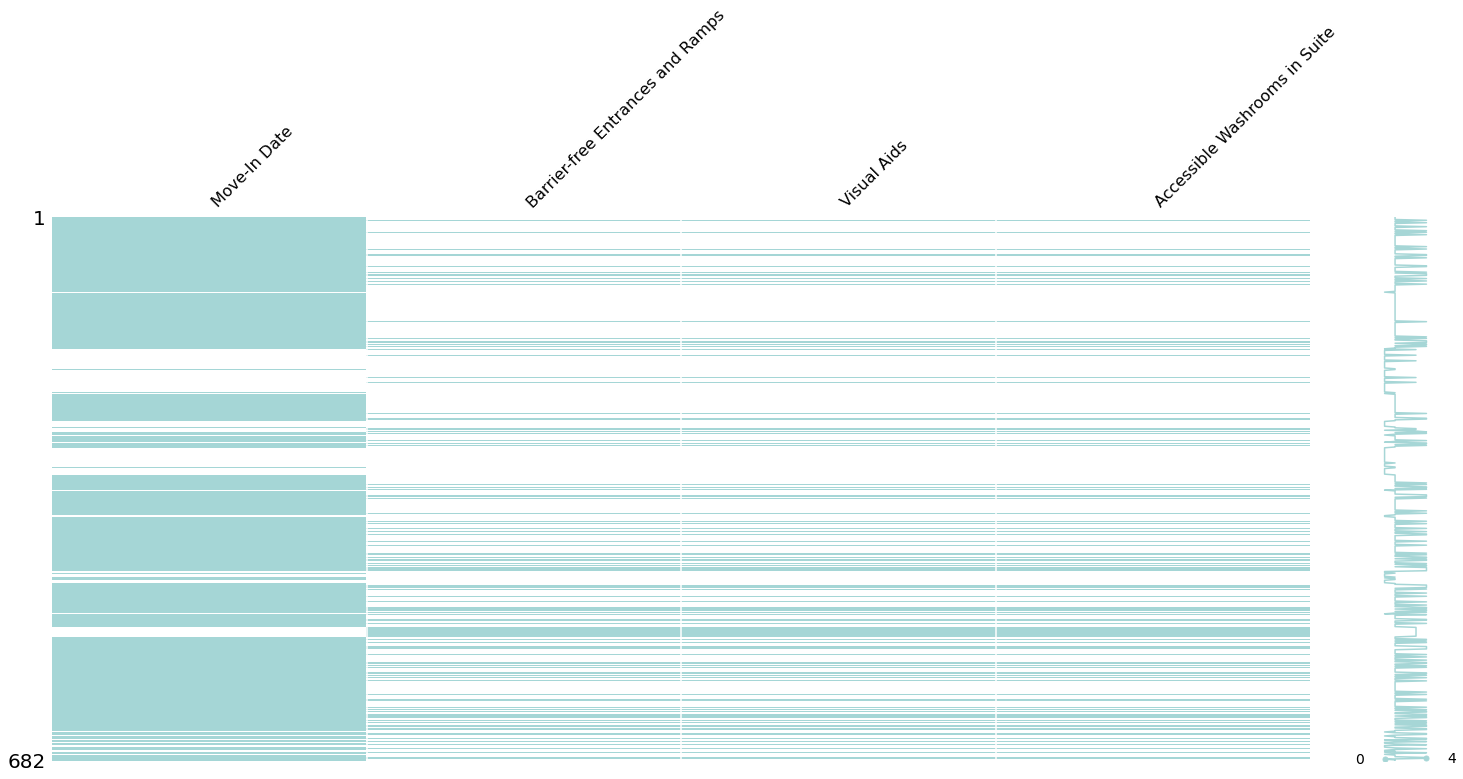

In [22]:
#Check for nan
missingdata_cols = DF.columns[DF.isnull().any()].to_list()
#visualize nan
_=missingno.matrix(DF[missingdata_cols], color=(0.65,0.84,0.84))

In [23]:
DF['geotag']=None

In [24]:
def geocode(addresses):
    #Input: a dictionary with key as index and value as address
    #Output: a dictionary with key as index and value as (lat, long) tuple
    lat_long = {}
    for index in addresses:
        try:
            url = geocode_api+f'?address={addresses[index]}'+f'&key={google_api}'
            url = re.sub(' +', '%20', url)
            response = requests.get(url)
            if response.ok:
                content = response.json()
                lat_long[index]=tuple(content['results'][0]['geometry']['location'].values())
            else:
                lat_long[index]=None
        except Exception as e:
            print(e)
            lat_long[index]=None
    return lat_long

### Geolocation based on address

In [26]:
addresses = DF[DF['geotag'].isnull()]['address'].to_dict()
lat_long = geocode(addresses)
DF['geotag'] = lat_long.values()
#DF.loc[lat_long.keys(), 'geotag'] = DF.loc[lat_long.keys()].index.map(lat_long)

list index out of range


In [34]:
DF.head()

,ad_id,images,title,address,price,post_published_date,rental_type,bedroom_no,bathroom_no,utilities_list,...,Move-In Date,Pet Friendly,Size (sqft),Furnished,Air Conditioning,Smoking Permitted,Barrier-free Entrances and Ramps,Visual Aids,Accessible Washrooms in Suite,geotag
0,1515948914,[https://i.ebayimg.com/00/s/NzY4WDEzNjU=/z/K40...,"Parkway Forest Towers - 2 Bedroom, 1 Bathroom ...","100 Parkway Forest Drive, Toronto, ON, M2J 1L6","$2,209.00",2020-08-13T22:34:37.000Z,Apartment,Bedrooms: 2,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,"August 13, 2020",Yes,940,No,No,Yes,NaN,NaN,NaN,"(43.7733049, -79.3418471)"
1,1505801433,[https://i.ebayimg.com/00/s/NzY4WDExNTI=/z/jms...,Open House August 12th from 7:00pm to 9:00pm w...,"70 Spadina Road, Toronto, ON, M5R 2T6","$1,587.00",2020-08-13T14:02:28.000Z,Apartment,Bedrooms: Bachelor/Studio,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,"September 1, 2020",Yes,Not Available,No,No,Outdoors only,NaN,NaN,NaN,"(43.6704926, -79.4056939)"
2,1502301137,[https://i.ebayimg.com/00/s/NjAwWDgwMA==/z/cIk...,"One, two bedroom large unit from $1650 , Hydro...","40 Tuxedo Ct, Scarborough, ON M1G 3S7, Canada","$1,650.00",2020-07-17T14:08:19.000Z,Apartment,Bedrooms: 1,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,"July 24, 2020",Limited,750,No,No,Outdoors only,NaN,NaN,NaN,"(43.78136869999999, -79.230797)"
3,1505788420,[https://i.ebayimg.com/00/s/NzY4WDExNTI=/z/NmU...,1 Bedroom Renovated Apartment for Rent - 135 T...,"135 Tyndall Avenue, Toronto, ON, M6K 2G4","$1,949.00",2020-08-13T19:06:36.000Z,Apartment,Bedrooms: 1,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,"August 13, 2020",Yes,626,No,No,No,NaN,NaN,NaN,"(43.6377125, -79.4283233)"
4,1516085720,[https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/fcY...,"Yonge and Finch, 1+1 unit , spacious and brigh...","M2N 5R6, Canada","$2,100.00",2020-08-06T02:49:14.000Z,Condo,Bedrooms: 1 + Den,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,"August 4, 2020",No,675,No,Yes,No,Yes,No,Yes,"(43.7758397, -79.4142973)"


### Adding Postal codes

In [44]:
DF["postal_code"]=DF["address"].map(lambda x : x.split(",")[-1])

In [46]:
DF.head(1)

,ad_id,images,title,address,price,post_published_date,rental_type,bedroom_no,bathroom_no,utilities_list,...,Pet Friendly,Size (sqft),Furnished,Air Conditioning,Smoking Permitted,Barrier-free Entrances and Ramps,Visual Aids,Accessible Washrooms in Suite,geotag,postal_code
0,1515948914,[https://i.ebayimg.com/00/s/NzY4WDEzNjU=/z/K40...,"Parkway Forest Towers - 2 Bedroom, 1 Bathroom ...","100 Parkway Forest Drive, Toronto, ON, M2J 1L6","$2,209.00",2020-08-13T22:34:37.000Z,Apartment,Bedrooms: 2,Bathrooms: 1,"[No: Hydro, Yes: Heat, Yes: Water]",...,Yes,940,No,No,Yes,NaN,NaN,NaN,"(43.7733049, -79.3418471)",M2J 1L6


### Save standalone craigslist dataset

In [47]:
with open('kijijilist_standalone.pkl', 'wb') as f:
    pickle.dump(DF, f)
with open('kijijilist_standalone.pkl', 'rb') as f:
    DF = pickle.load(f)

### Get MCI Data

In [53]:
with open('crime_data.pkl', 'rb') as f:
    crime_data = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'crime_data.pkl'

In [52]:
crime_data.head()

NameError: name 'crime_data' is not defined

### Connect tables Housing and MCI meaningfully!

In [50]:
def be_the_bridge(DF, crime_data, radius=3):
    
    bridge = pd.DataFrame()
    for row in tqdm(DF.iterrows()):
        try:
            
            loc = row[1]['geotag']
            result=crime_data[['Lat', 'Long']].apply(lambda x: (harvesine_distance(loc, (x['Lat'], x['Long'])) if harvesine_distance(loc, (x['Lat'], x['Long'])) <=radius else None), axis=1)
            result=pd.DataFrame(result[result.notnull()], columns=['distance'])
            closest_crimes=pd.concat([crime_data.loc[result.index, 'ID'], result], axis=1)
            closest_crimes['rental_id'] = row[1]['id']
            closest_crimes.rename({'ID':'crime_id'})

            bridge=pd.concat([bridge, closest_crimes])
        
        except:
            print(row[0])
            
    return bridge

In [51]:
bridge = be_the_bridge(DF, crime_data, radius=3)

NameError: name 'crime_data' is not defined